# Stanford AA274A Autumn 2020 HW1
Student: Haiyuan Mei

## 1. Trajectory Generation via Differential Flatness

### (i). Write a set of linear equations in the coefficients $x_i$, $y_i$.

Similar to lecture notes, the set of equations can be written as:  

$$
\begin{bmatrix} 
\psi_1(t_0) & \psi_2(t_0) & \psi_3(t_0) & \psi_4(t_0) \\
\dot \psi_1(t_0) & \dot \psi_2(t_0) & \dot \psi_3(t_0) & \dot \psi_4(t_0)\\
\psi_1(t_f) & \psi_2(t_f) & \psi_3(t_f) & \psi_4(t_f) \\
\dot \psi_1(t_f) & \dot \psi_2(t_f) & \dot \psi_3(t_f) & \dot \psi_4(t_f)\\
\end{bmatrix}
\begin{bmatrix} 
x_1 & y_1 \\
x_2 & y_2 \\
x_3 & y_3 \\
x_4 & y_4 \\
\end{bmatrix} = 
\begin{bmatrix} 
x(t_0) & y(t_0)\\
\dot x(t_0) & \dot y(t_0)\\
x(t_f) & y(t_f)\\
\dot x(t_f) & \dot y(t_f)\\
\end{bmatrix}
$$  

Given $ \psi_1(t) = 1, \psi_2(t) = t, \psi_3(t) = t^2, \psi_4(t) = t^3$, and $\dot x(t)=V(t)\cos(\theta(t)), \dot y(t)=V(t)\sin(\theta(t))$, the matrix equation becomes:  

$$
\begin{bmatrix} 
1 & t_0 & t_0^2 & t_0^3 \\
0 & 1 & 2t_0 & 3t_0^2\\
1 & t_f & t_f^2 & t_f^3 \\
0 & 1 & 2t_f & 3t_f^2\\
\end{bmatrix}
\begin{bmatrix} 
x_1 & y_1 \\
x_2 & y_2 \\
x_3 & y_3 \\
x_4 & y_4 \\
\end{bmatrix} = 
\begin{bmatrix} 
x(t_0) & y(t_0)\\
V(t_0)\cos(\theta(t_0)) & V(t_0)\sin(\theta(t_0)) \\
x(t_f) & y(t_f)\\
V(t_f)\cos(\theta(t_f)) & V(t_f)\sin(\theta(t_f))\\
\end{bmatrix}
$$  

Plug in with the following:
$$
\begin{align*}
t_0 &= 0 \\
x(0)&=0 \\
y(0)&=0 \\
V(0)&=0.5 \\
\theta(0)&=-\frac{\pi}{2} \\
t_f &= 15 \\
x(t_f)&=5 \\
y(t_f)&=5 \\
V(t_f)&=0.5 \\
\theta(t_f)&=-\frac{\pi}{2}
\end{align*}
$$

The final solution for the equations is:

$$
\begin{bmatrix} 
x_1 & y_1 \\
x_2 & y_2 \\
x_3 & y_3 \\
x_4 & y_4 \\
\end{bmatrix} = 
\begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0\\
1 & 15 & 225 & 3375 \\
0 & 1 & 30 & 675\\
\end{bmatrix}^{-1}
\begin{bmatrix} 
0 & 0\\
0 & -0.5 \\
5 & 5\\
0 & -0,5\\
\end{bmatrix}
$$  

The coefficients for the equations can be calculated with python numpy:

In [1]:
import numpy as np
A=np.array([[1,0,0,0],[0,1,0,0],[1,15,225,3375],[0,1,30,675]])
b=np.array([[0,0],[0,-0.5],[5,5],[0,-0.5]])
coeffs = np.dot(np.linalg.inv(A),b)
coeffs

array([[ 0.        ,  0.        ],
       [ 0.        , -0.5       ],
       [ 0.06666667,  0.16666667],
       [-0.00296296, -0.00740741]])

### (ii). Why can't we set $V(t_f)=0$?

When we set $V(t_f)=0$, the system is no longer differential flat.  
In particular, the following equation is no longer solvable because of a singular transforming matrix.  

$$
\begin{bmatrix} 
\ddot x(t) \\
\ddot y(t) \\
\end{bmatrix} = 
\begin{bmatrix} 
\cos \theta & -V\sin \theta \\
\sin \theta & V\cos \theta \\
\end{bmatrix} 
\begin{bmatrix} 
\alpha \\
\omega \\
\end{bmatrix}\\
$$

### (iii). Coding

### (iv). Coding

### (v). differential flatness plot

In [2]:
from IPython.display import Image

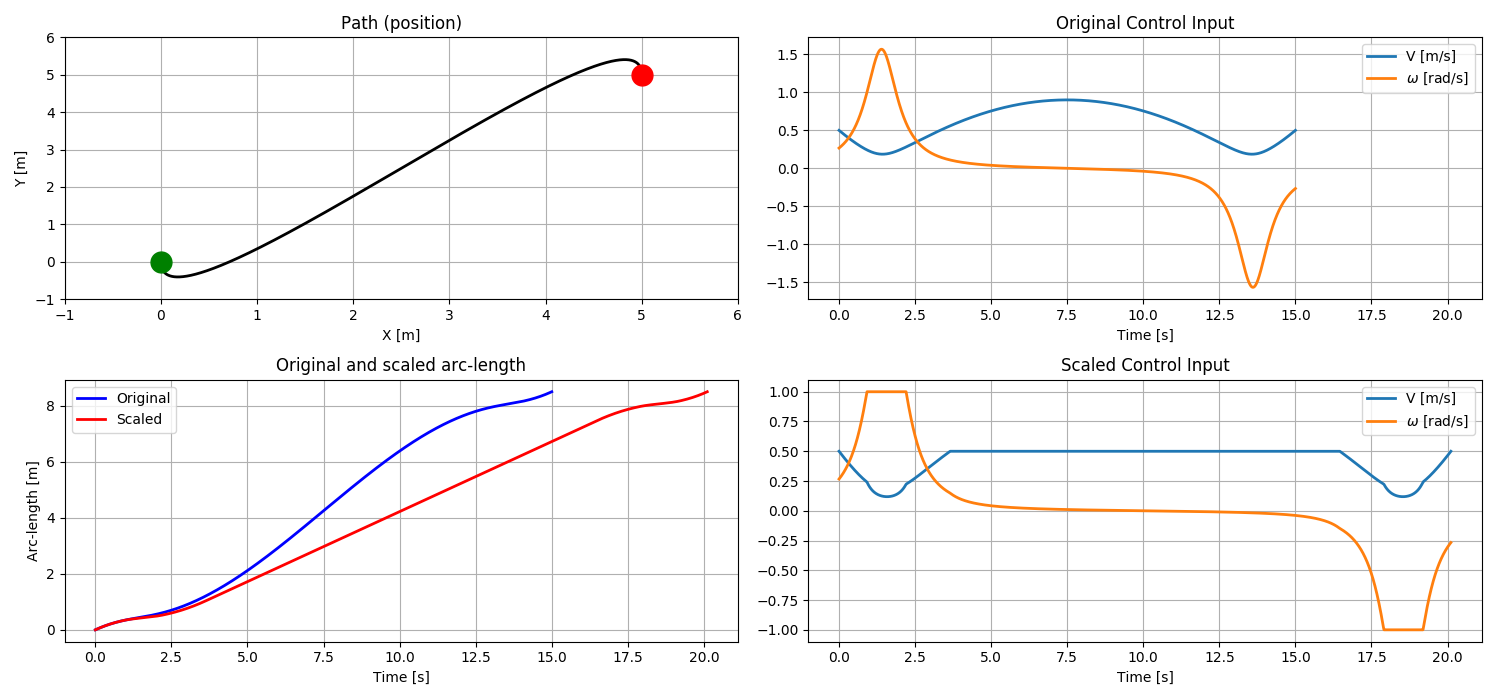

In [3]:
Image(filename='HW1/plots/differential_flatness.png') 

### (vi). sim_traj_openloop plot

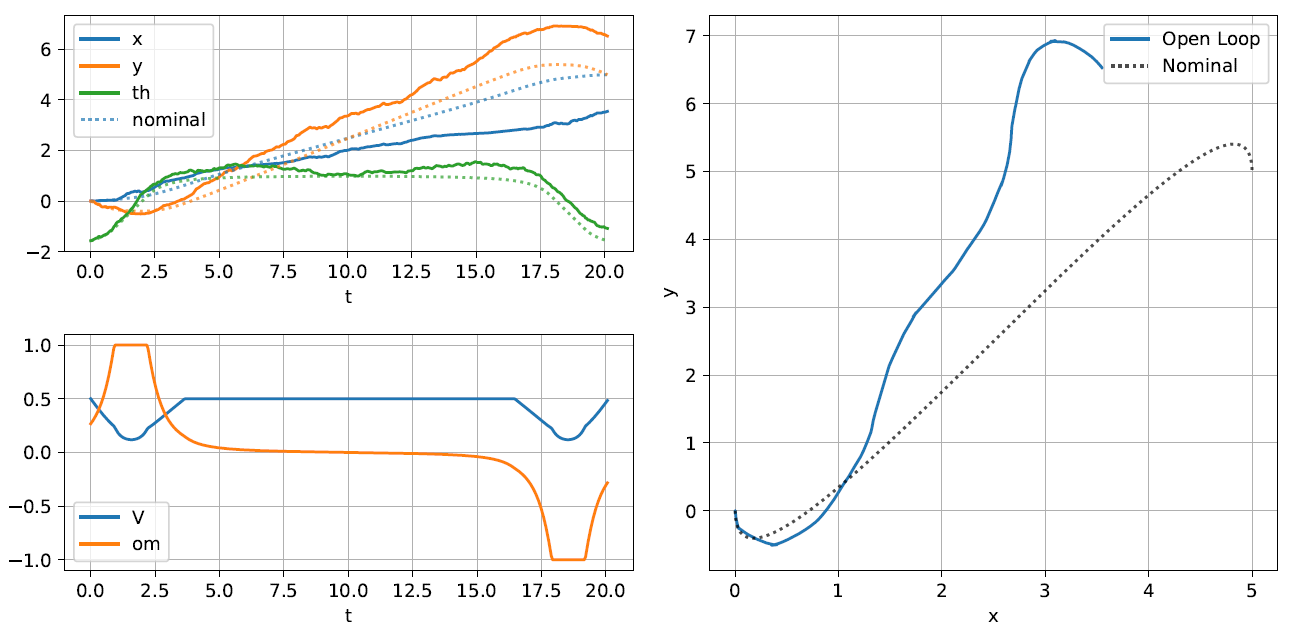

In [4]:
#PDF('HW1/plots/sim_traj_openloop.pdf',size=(1000,600))
Image(filename='HW1/plots/sim_traj_openloop.PNG') 

## 2. Pose Stabilization

### (i). Coding

### (ii). Test result (no write up)

### (iii). sim_parking_[parking-type] plot

#### sim_parking_forward.png:

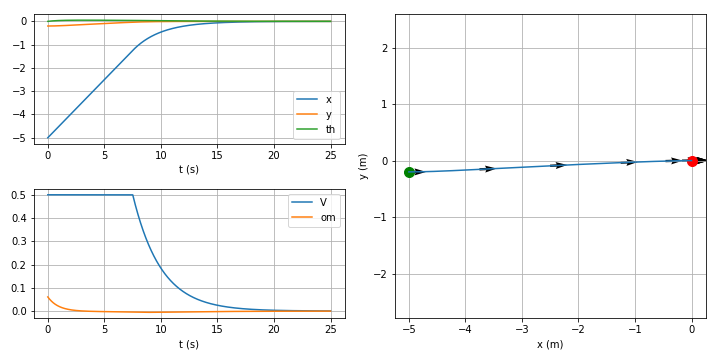

In [5]:
Image(filename='HW1/plots/sim_parking_forward.png') 

#### sim_parking_reverse.png:

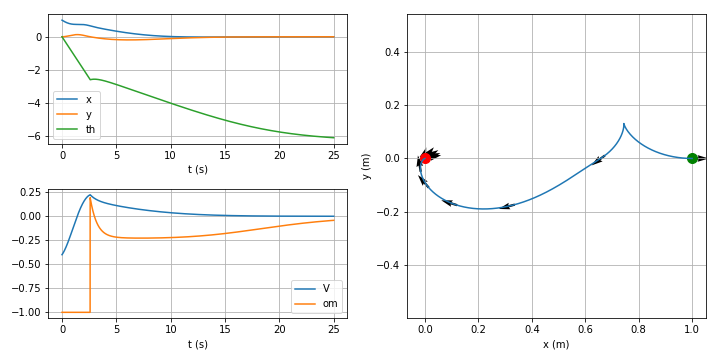

In [6]:
Image(filename='HW1/plots/sim_parking_reverse.png') 

#### sim_parking_parallel.png:

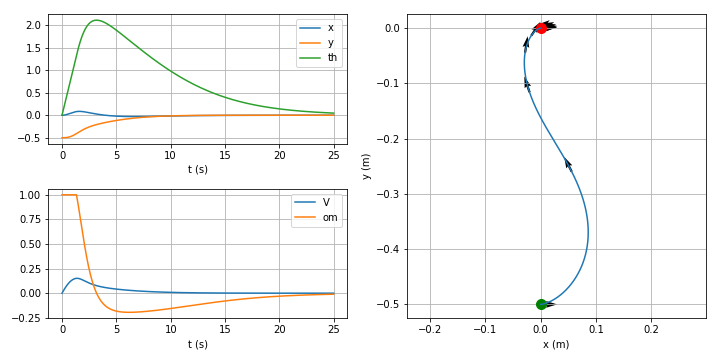

In [7]:
Image(filename='HW1/plots/sim_parking_parallel.png') 

## 3. Trajectory Tracking

### (i). Write down a system of equations for computing the true control inputs $(V,\omega)$ in terms of the virtual controls $(u_1,u_2) = \ddot x, \ddot y$ and the vehicle state.  

From the kinematic model: 
$$
\dot x(t) = V \cos \theta(t) \\
\dot y(t) = V \sin \theta(t)
$$
Take the derivative w.r.t. $\dot x, \dot y$ we get:  

$$
\begin{bmatrix} 
u_1 \\
u_2 \\
\end{bmatrix} = 
\begin{bmatrix} 
\ddot x(t) \\
\ddot y(t) \\
\end{bmatrix} = 
\begin{bmatrix} 
\cos \theta & -V\sin \theta \\
\sin \theta & V\cos \theta \\
\end{bmatrix} 
\begin{bmatrix} 
\alpha \\
\omega \\
\end{bmatrix}\\
$$
where $\alpha(t)=\dot V(t)$ is the acceleration, $\omega(t) = \dot \theta(t)$ is the torque.   
Solve the above linear equation we get the acceleration and torque:   

$$
\begin{bmatrix} 
\alpha \\
\omega \\
\end{bmatrix}=
\begin{bmatrix} 
\cos \theta & -V\sin \theta \\
\sin \theta & V\cos \theta \\
\end{bmatrix}^{-1} 
\begin{bmatrix} 
u_1 \\
u_2 \\
\end{bmatrix}
$$

and from the acceleration $\alpha(t)$ we integrate to the current speed:  

$$
V = \int_0^t \alpha(t')dt'
$$

### (ii). Coding

### (iii) Validate and plot.

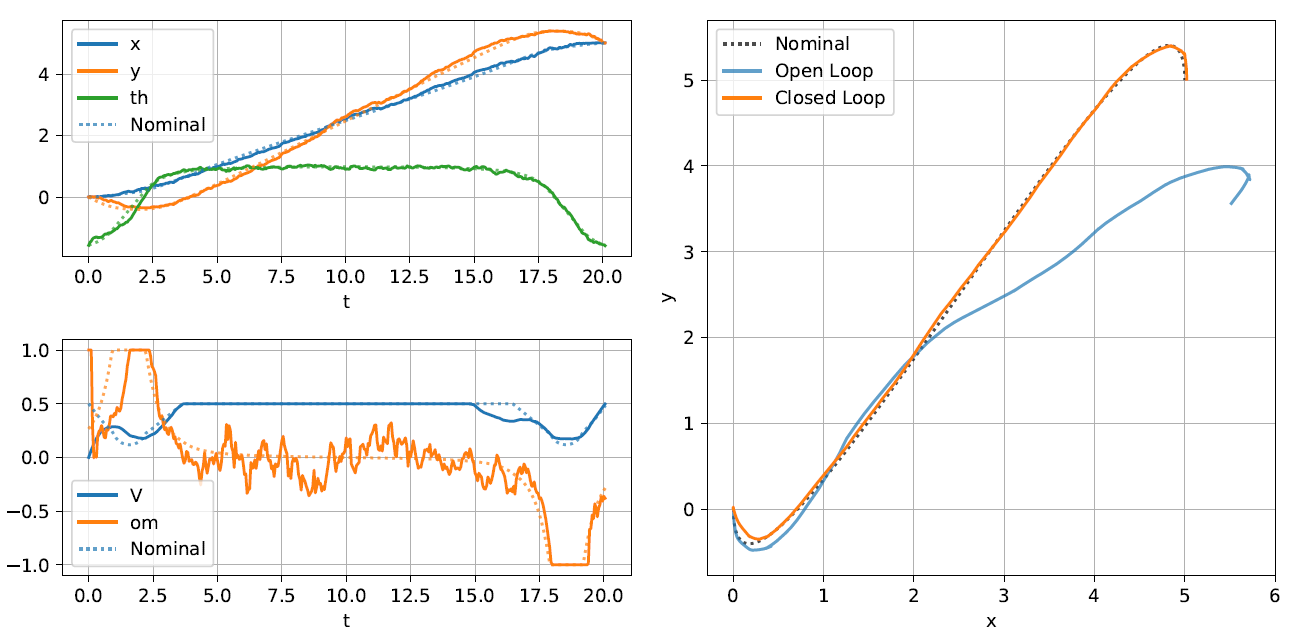

In [8]:
Image(filename='HW1/plots/sim_traj_closedloop.PNG') 

## 4. Extra. Optimal Control and Trajectory Optimization

### (i). Derive the Hamiltonian and NOC and formulate the problem as a 2P-BVP.
The target function contains only a running cost, the termination cost is hence 0; we have:
$$
\begin{align*}
h(x(t),t)&=0 \\
g(x(t),u(t),t) &= \lambda + V(t)^2 + \omega(t)^2 \\
a(x(t),u(t),t)&=
\begin{bmatrix} 
\dot x(t) \\
\dot y(t) \\
\dot \theta(t) \\
\end{bmatrix} = 
\begin{bmatrix} 
V(t) \cos \theta(t) \\
V(t) \sin \theta(t) \\
\omega(t) \\
\end{bmatrix}
\end{align*}
$$


And it has no state/control constraints, so we follow lecture 5 slide 6 to form the Halmitonianas following:  
$$
\begin{align*}
H(x^*(t), u^*(t), p^*(t), t)) &=g(x(t),u(t),t)+p^T(t)[a(x(t),u(t),t)] \\
&=\lambda+V(t)^2+\omega(t)^2+p_1(t)V(t)\cos \theta(t) + p_2(t) V(t) \sin \theta(t) + p_3(t) \omega(t) \\
\end{align*}
$$

The optimal solution satisfies the following Hamiltonian equations. The superscript * denotes this is the optimal value of the OCP problem.  

$$
\begin{align*}
\dot x^*&=\frac{\partial H}{\partial p_1} = V^*(t) \cos \theta^*(t) \tag 1 \\
\dot y^*&=\frac{\partial H}{\partial p_2} = V^*(t) \sin \theta^*(t) \tag 2 \\
\dot \theta^*&=\frac{\partial H}{\partial p_3} = \omega^*(t) \tag 3 \\
\dot p_1^*&=-\frac{\partial H}{\partial x} = 0 \tag 4 \\
\dot p_2^*&=-\frac{\partial H}{\partial y} = 0 \tag 5 \\
\dot p_3^*&=-\frac{\partial H}{\partial \theta} = p_1^*(t) V^*(t) \sin \theta^*(t) - p_2^*(t) V^*(t) \cos \theta^*(t) \tag 6 \\
0 &= \frac{H}{V} = 2 V^*(t) + p_1^*(t) \cos \theta^*(t) + p_2^*(t) \sin \theta^*(t) \tag 7 \\
0 &= \frac{H}{w} = 2 \omega^*(t) + p_3^*(t) \tag 8
\end{align*}
$$


The boundary conditions are: 
$$
\begin{align*}
x(0) &= 0 \\
y(0) &= 0 \\
\theta(0) &= -\frac{\pi}{2} \\
x(t_f) &= 5 \\
y(t_f) &= 5 \\
\theta(t_f) &= -\frac{\pi}{2}
\end{align*}
$$
And since $t_f$ is free, $x(t_f)$ is fixed, from lexture 5 lecture slide 8 we got another boundary condition:  
$$
\begin{align*}
&H(x^*(t_f), u^*(t_f), p^*(t_f), t_f))+\frac{\partial h}{\partial t}(x^*(t_f),t_f)=0 \\
&\Rightarrow \lambda+V^*(t_f)^2+\omega^*(t_f)^2+p_1^*(t_f)V^*(t_f)\cos \theta^*(t_f) + p_2^*(t_f) V^*(t_f) \sin \theta^*(t_f) + p_3^*(t_f) \omega^*(t_f) = 0
\end{align*}
$$


For free $t_f$ problem we introduce a new dummy state $r$ that corresponds to $t_f$ with dynamics $\dot r = 0$ as the last ODE of the BVP problem: 
$$
\dot r = 0 \tag 9
$$

the BVP state is hence $z=[x,y,\theta,p_1,p_2,p_3,r]$. Replace all occurrances of $t_f$ with 1 and rewrite the BVP's boundary conditions as:  

$$
\begin{align*}
x(0) &= 0 \tag {10} \\
y(0) &= 0 \tag {11} \\
\theta(0) + \frac{\pi}{2} &= 0 \tag {12} \\
x(1) - 5 &= 0 \tag {13} \\
y(1) - 5 &= 0 \tag {14} \\
\theta(1) + \frac{\pi}{2} &= 0 \tag {15} \\
H(x^*(1), u^*(1), p^*(1), 1) &= \lambda+V^*(1)^2+\omega^*(1)^2 +p_1^*(1)V^*(1)\cos \theta^*(1) \\
&+ p_2^*(1) V^*(1) \sin \theta^*(1) + p_3^*(1) \omega^*(1)=0 \tag {16} 
\end{align*}
$$

Now the set of ODE for the 2P-BVP is the above Hamiltonian equations (1)-(6) and equation (9), and the boundary conditions for the 2P-BVP is the aboive equation (10)-(16). 

The Hamiltonian equations (7), (8) also gives the solution of the input $[V, \omega]$ of the dynamics. 

### (ii). Coding

### (iii). plot

#### Solution 1

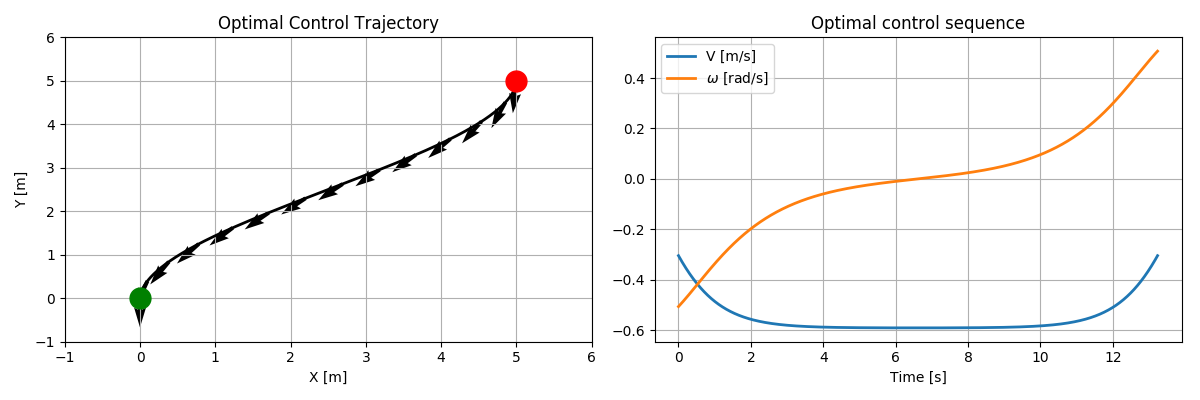

In [9]:
Image(filename='HW1/plots/optimal_control.png') 

#### Solution 2

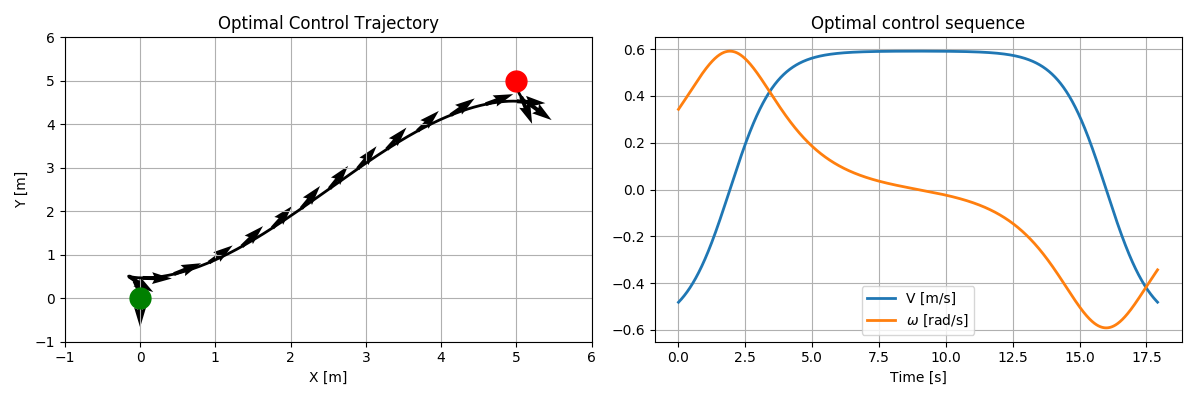

In [10]:
Image(filename='HW1/plots/optimal_control-1.png') 

### (iv). Explain the significance of using the largest feasible $\lambda$

The choose of largest feasible $\lambda$ will allow the solution to be able to reach the upper bound of input $V$ and $\omega$ that is within the input constraints, and find a fastest solution. In the following cost function: 
$$
J = \lambda t_f + \int_0^{t_f} V^2 + \omega^2 dt
$$
In order to minimize $J$, the larget the value $\lambda$, the smaller the time is driven, and hence pushing speed $V$ and $\omega$ to reach their upper bounds.

### (v). Validate and plot

By randomly sample a initial guess, I came up with two different solutions. Further step is to pick one from them and use the one with smaller cost. Here I just include both these solutions. 

#### Solution 1
initial_guess=(3.24207804e+00,3.33710509e+00,-3.14159265e+00,1.86043668e+00,8.46899596e-01,2.05139181e+00,2.00000000e+03)

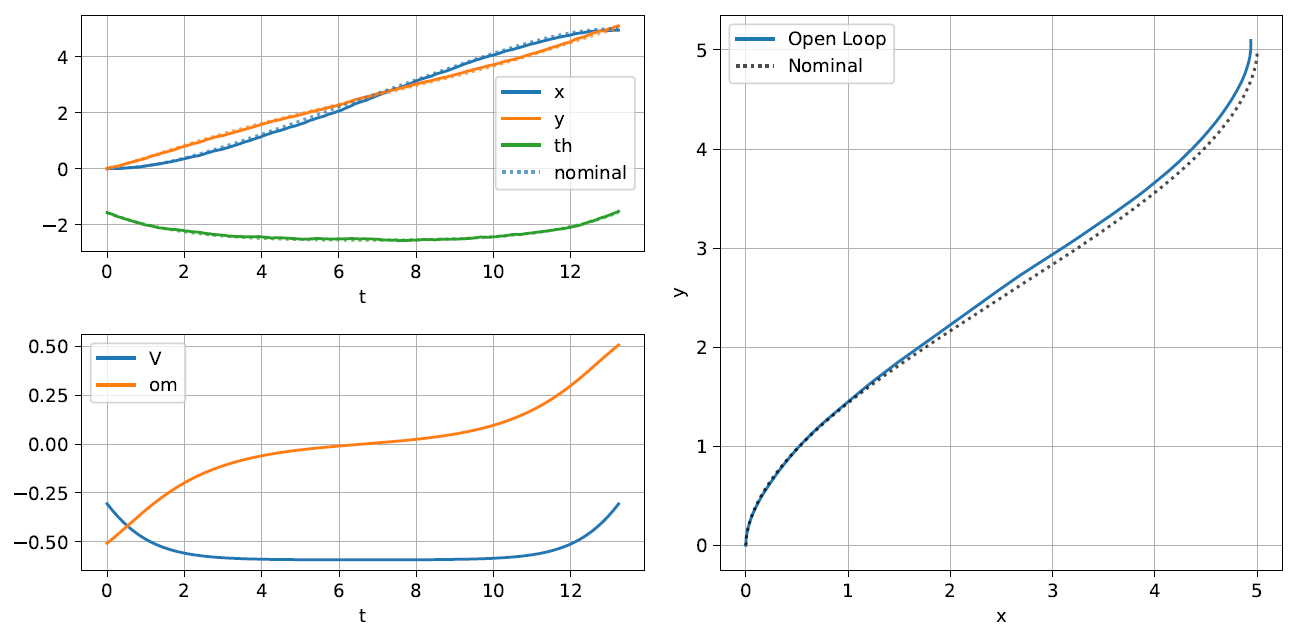

In [11]:
Image(filename='HW1/plots/sim_traj_optimal_control.PNG') 

##### Solution 2:   
initial_guess = (2.56992092e-01,9.49860400e-01,-3.14159265e+00,5.06923249e-01,2.80611260e+00,2.59356897e+00,2.00000000e+03)

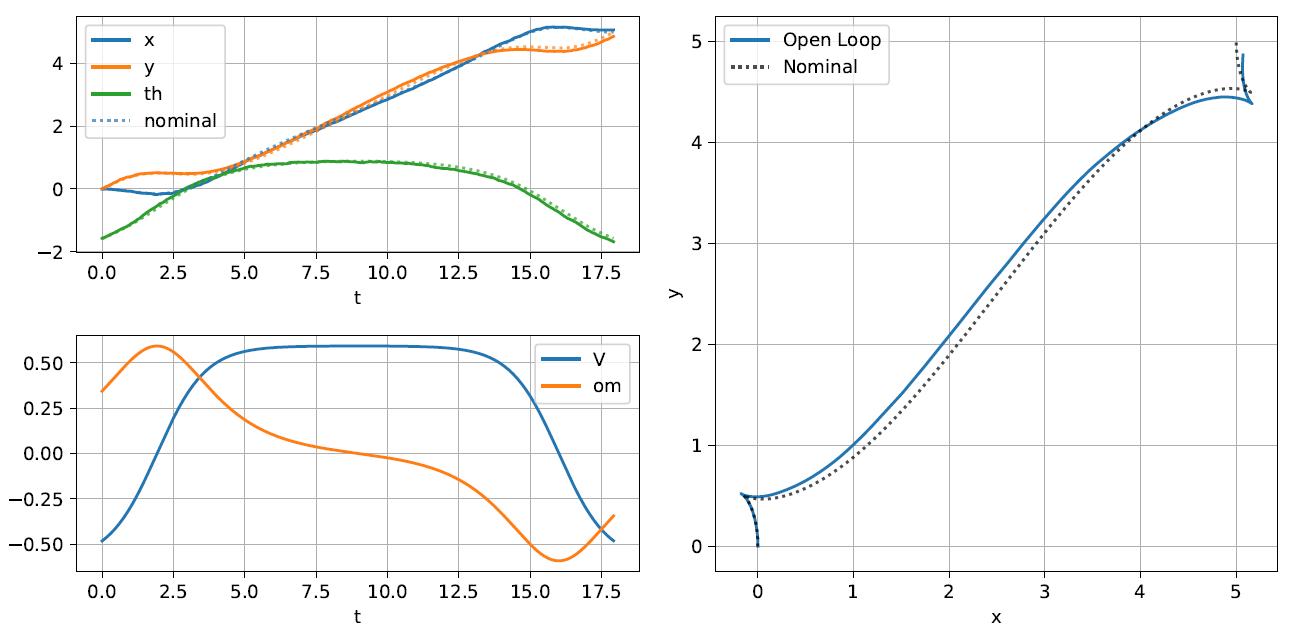

In [12]:
Image(filename='HW1/plots/sim_traj_optimal_control-1.PNG') 